KAGGLEDAN VERI ÇEKME

**For Data**
**https://www.kaggle.com/datasets/kenjee/z-by-hp-unlocked-challenge-3-signal-processing**

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
%cd /content/drive/MyDrive/Colab Notebooks/CAPUCHINGAN

/content/drive/MyDrive/Colab Notebooks/CAPUCHINGAN


In [ ]:
!pip install opendatasets
import opendatasets as od
od.download('https://www.kaggle.com/datasets/kenjee/z-by-hp-unlocked-challenge-3-signal-processing')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: uraninjo
Your Kaggle Key: ··········


100%|██████████| 604M/604M [00:26<00:00, 23.5MB/s]


In [ ]:
import os,shutil
%cd /content/drive/MyDrive/Colab Notebooks/CAPUCHINGAN/z-by-hp-unlocked-challenge-3-signal-processing
if os.path.exists("Forest Recordings"):
  shutil.rmtree("Forest Recordings")
if os.path.exists("Parsed_Not_Capuchinbird_Clips"):
  shutil.rmtree("Parsed_Not_Capuchinbird_Clips")
else:
  print("Files does not exist")

/content/drive/MyDrive/Colab Notebooks/CAPUCHINGAN/z-by-hp-unlocked-challenge-3-signal-processing


IMPORTLAR VE KÜTÜPHANELERIN YUKLENMESİ

In [ ]:
!pip install tensorflow
!pip install tensorflow-gpu
!pip install tensorflow-io
!pip install matplotlib


     |████████████████████████████████| 462 kB 4.3 MB/s 
     |████████████████████████████████| 497.5 MB 18 kB/s 
     |████████████████████████████████| 23.4 MB 1.6 MB/s 
     |████████████████████████████████| 2.1 MB 35.3 MB/s 
  Attempting uninstall: tensorflow-io-gcs-filesystem
    Found existing installation: tensorflow-io-gcs-filesystem 0.24.0
    Uninstalling tensorflow-io-gcs-filesystem-0.24.0:
      Successfully uninstalled tensorflow-io-gcs-filesystem-0.24.0


In [55]:
import os
from matplotlib import pyplot as plt
import tensorflow as tf
import tensorflow_io as tfio


In [56]:
%cd /content/drive/MyDrive/Colab Notebooks/CAPUCHINGAN
MUSIC_FILE=os.path.join('z-by-hp-unlocked-challenge-3-signal-processing','Parsed_Capuchinbird_Clips','XC114131-0.wav')

/content/drive/MyDrive/Colab Notebooks/CAPUCHINGAN


In [57]:
def load_wav_16k_mono(file):
    file_contents=tf.io.read_file(file)
    # Üstte sesi okuyup altta decode ediyor
    wav,sample_rate=tf.audio.decode_wav(file_contents,desired_channels=1)

    wav=tf.squeeze(wav,axis=-1)

    sample_rate=tf.cast(sample_rate,dtype=tf.int64)
    #Sinyal 44100Hzden 16000Hz'e azaltarak datayı azaltıyoruz
    wav=tfio.audio.resample(wav,rate_in=sample_rate,rate_out=16000)
    return wav

<tf.Tensor: shape=(40000,), dtype=float32, numpy=
array([-2.1452930e-08,  2.9903514e-08,  2.3691292e-08, ...,
        1.1810826e-02,  1.3428938e-02,  3.8246573e-03], dtype=float32)>

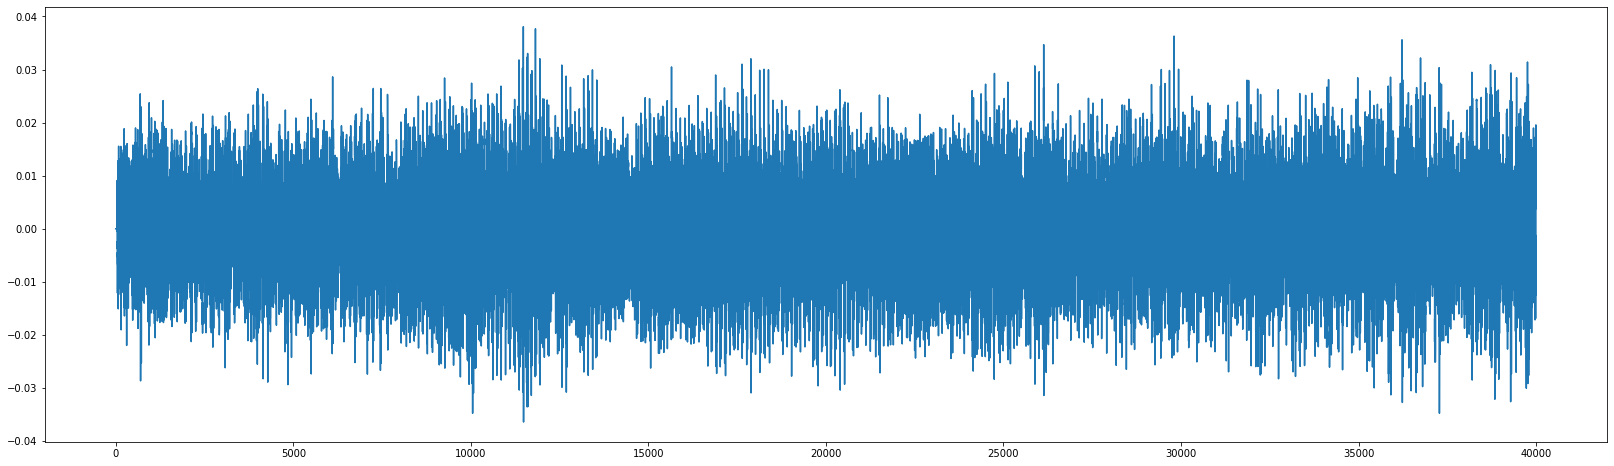

In [58]:
plt.figure(figsize=(28,8))
plt.plot(load_wav_16k_mono(MUSIC_FILE))
load_wav_16k_mono(MUSIC_FILE)

UZUNLUKLARI

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/CAPUCHINGAN
lengths=[]
for f in os.listdir(os.path.join('z-by-hp-unlocked-challenge-3-signal-processing','Parsed_Capuchinbird_Clips')):
    tensor_wave=load_wav_16k_mono(os.path.join('z-by-hp-unlocked-challenge-3-signal-processing','Parsed_Capuchinbird_Clips',f))
    lengths.append(len(tensor_wave))

/content/drive/MyDrive/Colab Notebooks/CAPUCHINGAN


In [ ]:
tf.math.reduce_mean(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [ ]:
tf.math.reduce_min(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [ ]:
tf.math.reduce_max(lengths)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

In [ ]:
print(f'mean: {54156/16000}sn, min: {32000/16000}sn, max: {80000/16000}sn')

mean: 3.38475sn, min: 2.0sn, max: 5.0sn


FOTOĞRAFA ÇEVİRİP GAN İÇİN KAYDEDİYORUM

In [ ]:
l=os.listdir(os.path.join('z-by-hp-unlocked-challenge-3-signal-processing','Parsed_Capuchinbird_Clips'))

In [ ]:
def preprocess(file_path): 
    wav = load_wav_16k_mono(file_path)
    wav = wav[:48000]
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav],0)
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    return spectrogram

In [ ]:
def tensor_to_image(tensor):
    tensor = tensor*255
    tensor = np.array(tensor, dtype=np.uint8)
    if np.ndim(tensor)>3:
        assert tensor.shape[0] == 1
        tensor = tensor[0]
    return PIL.Image.fromarray(tensor)

In [ ]:
os.mkdir('/content/drive/MyDrive/Colab Notebooks/CAPUCHINGAN/z-by-hp-unlocked-challenge-3-signal-processing/photoforgan')

In [ ]:
import numpy as np
import PIL

for i in os.listdir('/content/drive/MyDrive/Colab Notebooks/CAPUCHINGAN/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/'):
  spectrogram= preprocess(f'/content/drive/MyDrive/Colab Notebooks/CAPUCHINGAN/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/{i}')
  t=tensor_to_image(tf.transpose(spectrogram)[0])
  
  t.save('/content/drive/MyDrive/Colab Notebooks/CAPUCHINGAN/z-by-hp-unlocked-challenge-3-signal-processing/photoforgan/data/{}.jpeg'.format(i.split('.wav')[0]))
  